In [1]:
# 설정
import numpy as np
import os
np.random.seed(42)

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

font_path = 'C:/Windows/Fonts/나눔고딕/나눔고딕 보통.ttf'
fontprop = fm.FontProperties(fname=font_path, size=18)

plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# 한글출력
matplotlib.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False

# 그림을 저장할 폴드
PROJECT_ROOT_DIR = "C:/Users/daumsoft/Desktop/Python_project"
CHAPTER_ID = "classification"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

In [2]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)
X, y = mnist["data"], mnist["target"]
y = y.astype(np.int)

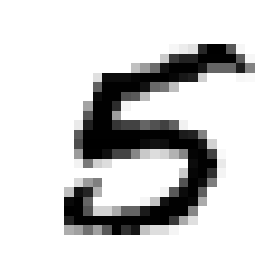

In [3]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

some_digit = X[20000]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary,
           interpolation="nearest")
plt.axis("off")

save_fig("some_digit_plot")
plt.show()

In [4]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = matplotlib.cm.binary, interpolation="nearest")
    plt.axis("off")

# 숫자 그림을 위한 추가 함수
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size, size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

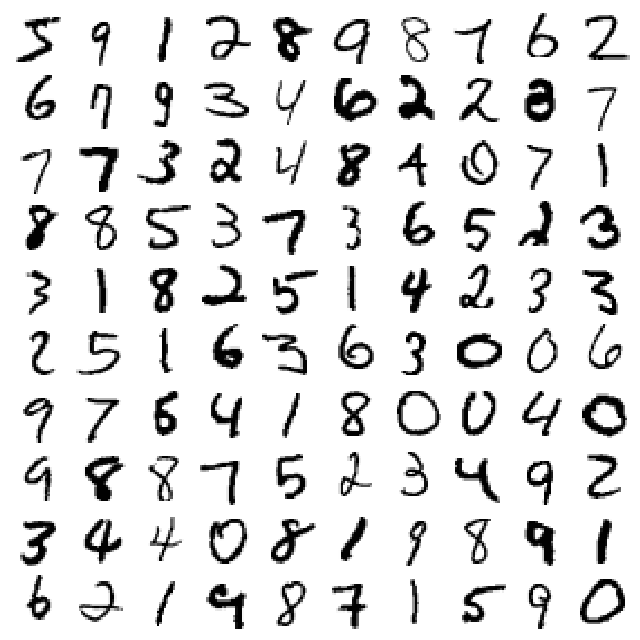

In [5]:
plt.figure(figsize=(9,9))
example_images = np.r_[X[:12000:600], X[13000:30600:600], X[30600:60000:590]]
plot_digits(example_images, images_per_row=10)
save_fig("more_digits_plot")
plt.show()

In [6]:
y[36000]

9

In [7]:
# 테스트 세트 만들기
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [8]:
# 훈련 세트(60,000개 이미지), 테스트 세트(10,000개 이미지)
# 훈련 세트 -> 교차 검증 폴드
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [9]:
# 이진 분류기
y_train_5 = (y_train == 5) # 5는 True
y_test_5 = (y_test == 5)

In [10]:
# 확률적 경사 하강법 분류기
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=5, random_state=42)
sgd_clf.fit(X_train, y_train_5)

C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=5,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=42, shuffle=True, tol=0.001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [11]:
sgd_clf.predict([some_digit])

array([ True])

In [12]:
# 성능 측정(폴드가 3개인 K-겹 교차 검증)
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


array([0.964 , 0.9579, 0.9571])

In [13]:
# 교차 검증 구현 함수
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=42)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]
    
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


0.964


C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


0.9579
0.9571


C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


In [14]:
# 모든 이미지를 '5 아님' 클래스로 분류하는 더미 분류기
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

# 정확도 측정
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.909  , 0.90745, 0.9125 ])

In [15]:
# 오차 행렬 조사를 통한 분류기 성능 평가 방법
# cross_val_predict() 함수는 K-겹 교차 검증 수행하지만 평가 점수를 반환하지 않고 각 테스트 폴드에서 얻은 예측 반환
# -> 훈련 세트의 모든 샘플에 대해 깨끗한(보지 못했던 데이터도) 예측 얻을 수 있음
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


In [16]:
# 오차 행렬
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)

array([[54058,   521],
       [ 1899,  3522]], dtype=int64)

In [17]:
# 정밀도와 재현율
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred)

0.8711352955725946

In [18]:
recall_score(y_train_5, y_train_pred)

0.6496956281128943

In [19]:
# F1 점수
from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_pred)

0.7442941673710904

In [20]:
# 정밀도/재현율 트레이드오프
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([110525.28117324])

In [21]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)

In [22]:
y_some_digit_pred

array([ True])

In [23]:
threshold = 20000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [24]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


In [25]:
y_scores.shape

(60000,)

In [26]:
# 모든 임계값에 대해 정밀도와 재현율 계산
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51076 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44247 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44050 missing from current font.
  font.set_text(s, 0.0, flags=flags)
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\matplotlib\backends\backend_agg.py:211:

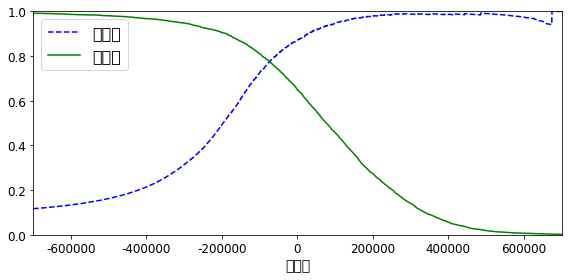

In [27]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="정밀도")
    plt.plot(thresholds, recalls[:-1], "g-", label="재현율")
    plt.xlabel("임곗값")
    plt.legend(loc="upper left", fontsize=16)
    plt.ylim([0, 1])
    
plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.xlim([-700000, 700000])
save_fig("precision_recall_vs_threshold_plot")
plt.show()

In [28]:
(y_train_pred == (y_scores > 0)).all()

True

In [29]:
y_train_pred_90 = (y_scores > 70000)

In [30]:
precision_score(y_train_5, y_train_pred_90)

0.9309882747068676

In [31]:
recall_score(y_train_5, y_train_pred_90)

0.5126360450101457

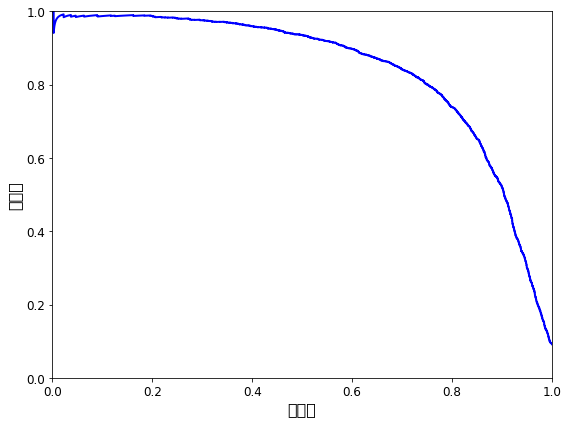

In [32]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("재현율", fontsize=16)
    plt.ylabel("정밀도", fontsize=16)
    plt.axis([0, 1, 0, 1])
    
plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
save_fig("precision_vs_recall_plot")
plt.show()

C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44144 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51667 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50577 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 48708 missing f

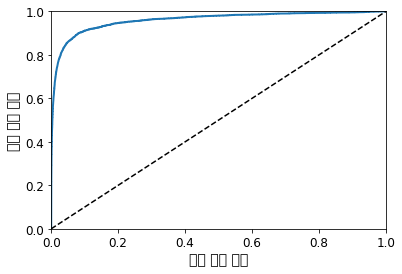

In [33]:
# ROC 곡선
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('거짓 양성 비율')
    plt.ylabel('진짜 양성 비율')

plot_roc_curve(fpr, tpr)
plt.show()

In [34]:
print ('버전: ', matplotlib.__version__)
print ('설치 위치: ', matplotlib.__file__)
print ('설정 위치: ', matplotlib.get_configdir())
print ('캐시 위치: ', matplotlib.get_cachedir())
print ('설정파일 위치: ', matplotlib.matplotlib_fname())

버전:  3.1.1
설치 위치:  C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\matplotlib\__init__.py
설정 위치:  C:\Users\daumsoft\.matplotlib
캐시 위치:  C:\Users\daumsoft\.matplotlib
설정파일 위치:  C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\matplotlib\mpl-data\matplotlibrc


In [35]:
# ROC의 AUC 계산
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.9598058535696421

In [36]:
# 랜덤 포레스트 분류기
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(n_estimators=10, random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method="predict_proba")

In [37]:
y_scores_forest = y_probas_forest[:, 1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44144 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51667 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50577 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 48708 missing f

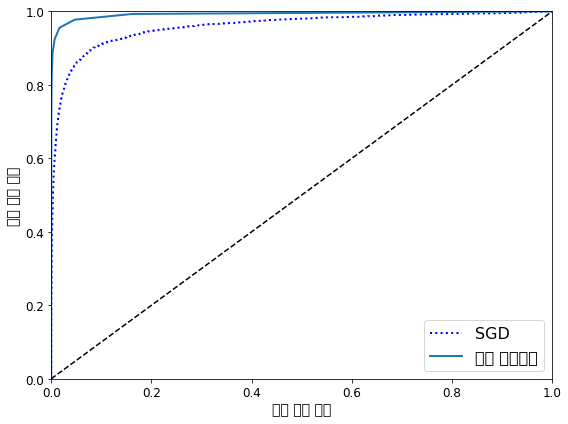

In [38]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "랜덤 포레스트")
plt.legend(loc="lower right", fontsize=16)
save_fig("roc_curve_comparison_plot")
plt.show()

In [39]:
roc_auc_score(y_train_5, y_scores_forest)

0.9928250745111685

In [40]:
y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3)
precision_score(y_train_5, y_train_pred_forest)

0.9870386643233744

In [41]:
recall_score(y_train_5, y_train_pred_forest)

0.8288138719793396

In [42]:
# 다중 분류
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


array([5])

In [43]:
# 클래스마다 하나씩, 총 10개의 점수 반환
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores

array([[ -473887.44107231,  -553440.28660867,  -733923.56548853,
         -418886.64046651,  -238238.70883587,   414723.21703471,
         -232059.48220673, -1355284.86070622,  -377296.14487829,
         -483255.67407784]])

In [44]:
np.argmax(some_digit_scores)

5

In [45]:
sgd_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [46]:
sgd_clf.classes_[5]

5

In [47]:
# SGDClassifier 기반으로 OvO 전략을 사용하는 다중 분류기
from sklearn.multiclass import OneVsOneClassifier

ovo_clf = OneVsOneClassifier(SGDClassifier(max_iter=5, random_state=42))
ovo_clf.fit(X_train, y_train)
ovo_clf.predict([some_digit])

C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of itera

C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of itera

array([5])

In [48]:
len(ovo_clf.estimators_)

45

In [49]:
# 랜덤 포레스트 분류기 훈련
forest_clf.fit(X_train, y_train)
forest_clf.predict([some_digit])

array([5])

In [50]:
# 분류기가 각 샘플에 부여한 클래스별 확률
forest_clf.predict_proba([some_digit])

array([[0. , 0. , 0. , 0. , 0. , 0.9, 0. , 0. , 0.1, 0. ]])

In [51]:
# 분류기 평가(교차 검증)
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


array([0.83935, 0.85125, 0.8676 ])

In [52]:
# 입력의 스케일 조정
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


array([0.91155, 0.91005, 0.9095 ])

In [53]:
# 에러 분석
# 오차 행렬
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


array([[5722,    2,   28,    9,    8,   49,   51,   11,   41,    2],
       [   2, 6494,   47,   23,    6,   42,    5,   10,  100,   13],
       [  51,   37, 5360,   88,   82,   23,   96,   56,  149,   16],
       [  51,   37,  149, 5318,    2,  248,   37,   57,  134,   98],
       [  19,   25,   39,    8, 5378,    7,   54,   29,   77,  206],
       [  73,   42,   35,  170,   73, 4622,  105,   30,  177,   94],
       [  31,   24,   43,    2,   43,   88, 5635,    4,   47,    1],
       [  20,   20,   65,   27,   58,   11,    6, 5806,   12,  240],
       [  53,  147,   78,  164,   11,  163,   56,   24, 5017,  138],
       [  42,   27,   25,   87,  175,   34,    3,  201,   85, 5270]],
      dtype=int64)

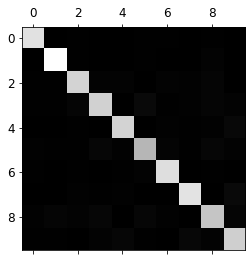

In [54]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

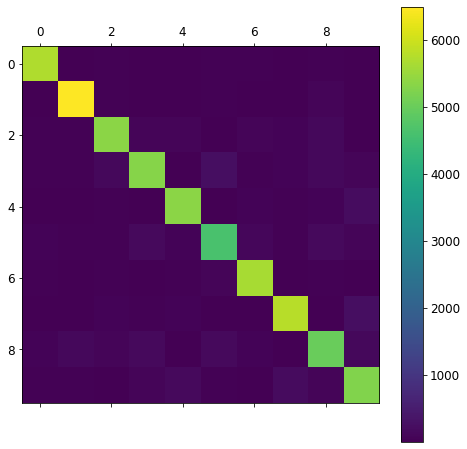

In [55]:
# 컬러 오차 행렬
def plot_confusion_matrix(matrix):
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111)
    cax = ax.matshow(matrix)
    fig.colorbar(cax)

plot_confusion_matrix(conf_mx)
plt.show()

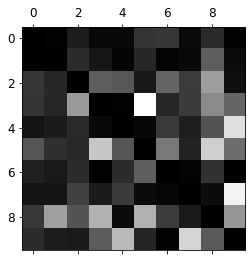

In [56]:
# 그래프의 에러 부분(짙을 수록 에러)
# 오차 행렬의 각 값을 대응되는 클래스의 이미지 개수로 나누어 에러 비율 비교
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

np.fill_diagonal(norm_conf_mx, 0) # 주대각선을 0으로 채워넣기
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

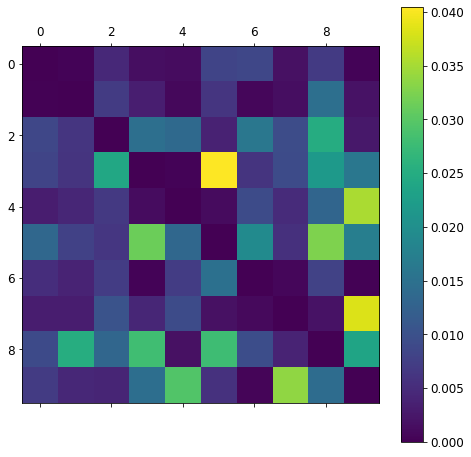

In [57]:
plot_confusion_matrix(norm_conf_mx)
plt.show()

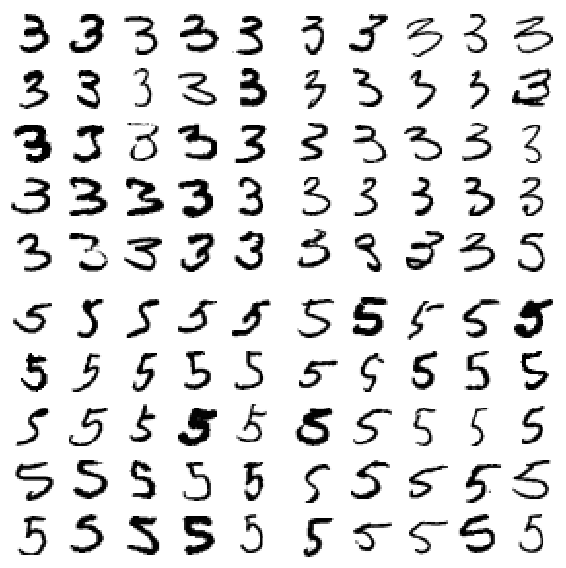

In [58]:
# 분류기의 성능 향상 보완
cl_a, cl_b = 3, 5
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)] # 실제,3, 예측 3
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)] # 실제 3, 예측 5
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)] # 실제 5, 예측 3
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)] # 실제 5, 예측 5

plt.figure(figsize=(8, 8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)

save_fig("error_analysis_digits_plot")
plt.show()

In [59]:
# 다중 레이블 분류
from sklearn.neighbors import KNeighborsClassifier

# 각 숫자 이미지에 두 개의 타깃 레이블이 담긴 y_multilabel 배열
y_train_large = (y_train >= 7) # 첫 번째 타깃은 큰 값(7, 8, 9)인지
y_train_odd = (y_train % 2 == 1) # 두 번째 타깃은 홀수인지
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [60]:
knn_clf.predict([some_digit])

array([[False,  True]])

In [61]:
# # 다중 레이블 분류기 평가
# # 각 레이블의 F1 점수를 구하고 평균 점수 계산
# y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3, n_jobs=-1)
# f1_score(y_multilabel, y_trian_knn_pred, average="macro")

In [62]:
# 다중 출력 분류
# 이미지에서 노이즈 제거
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

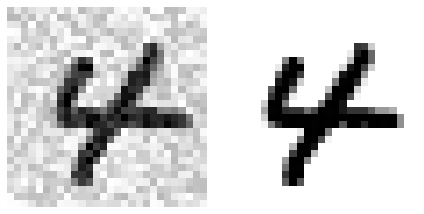

In [63]:
some_index = 5500
plt.subplot(121); plot_digit(X_test_mod[some_index])
plt.subplot(122); plot_digit(y_test_mod[some_index])
save_fig("noisy_digit_example_plot")
plt.show()

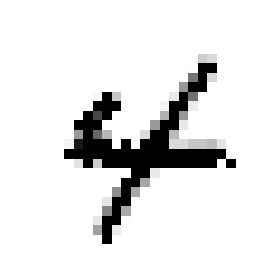

In [64]:
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[some_index]])
plot_digit(clean_digit)
save_fig("cleaned_digit_example_plot")

In [65]:
# 더미(랜덤) 분류기
from sklearn.dummy import DummyClassifier
dmy_clf = DummyClassifier()
y_probas_dmy = cross_val_predict(dmy_clf, X_train, y_train_5, cv=3, method="predict_proba")
y_scores_dmy = y_probas_dmy[:, 1]

C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\sklearn\dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44144 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51667 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50577 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 48708 missing f

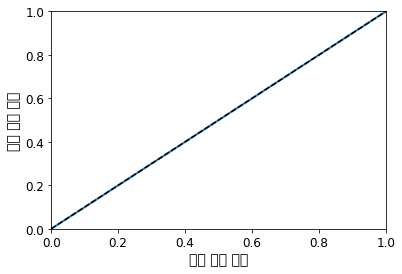

In [66]:
fprr, tprr, thresholdsr = roc_curve(y_train_5, y_scores_dmy)
plot_roc_curve(fprr, tprr)

In [67]:
# KNN 분류기
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_jobs=-1, weights='distance', n_neighbors=4)
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=4, p=2,
                     weights='distance')

In [68]:
y_knn_pred = knn_clf.predict(X_test)

In [70]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_knn_pred)

0.9714

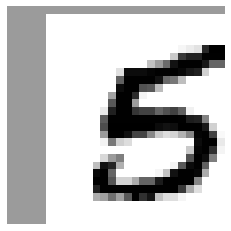

In [71]:
from scipy.ndimage.interpolation import shift

def shift_digit(digit_array, dx, dy, new=0):
    return shift(digit_array.reshape(28, 28), [dy, dx], cval=new).reshape(784)

plot_digit(shift_digit(some_digit, 5, 1, new=100))

In [73]:
X_train_expanded = [X_train]
y_train_expanded = [y_train]
for dx, dy in ((1, 0), (-1, 0), (0, 1), (0, -1)):
    shifted_images = np.apply_along_axis(shift_digit, axis=1, arr=X_train, dx=dx, dy=dy)
    X_train_expanded.append(shifted_images)
    y_train_expanded.append(y_train)

X_train_expanded = np.concatenate(X_train_expanded)
y_train_expanded = np.concatenate(y_train_expanded)
X_train_expanded.shape, y_train_expanded.shape

((300000, 784), (300000,))

In [74]:
knn_clf.fit(X_train_expanded, y_train_expanded)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=4, p=2,
                     weights='distance')

In [76]:
y_knn_expanded_pred = knn_clf.predict(X_test)

In [77]:
accuracy_score(y_test, y_knn_expanded_pred)

0.9763

In [78]:
ambiguous_digit = X_test[2589]
knn_clf.predict_proba([ambiguous_digit])

array([[0.24579675, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.75420325]])

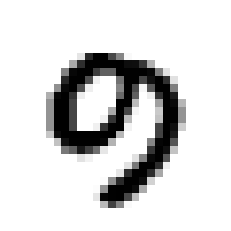

In [79]:
plot_digit(ambiguous_digit)